In [ ]:
import pandas as pd
import numpy as np
dataSet=pd.read_csv("/content/Marketing_Spend_ROI.csv")
print(dataSet.head(5))

                            Campaign_ID Marketing_Channel  Marketing_Spend  \
0  a7354157-2c1c-4a95-91f2-d7681781e192                TV          54062.0   
1  cfad360a-6d7e-4a21-a3b5-f74c7afde2b6             Print              NaN   
2  98973f53-7cbd-4c6a-a0d5-a0530fadf8cd                TV           4553.0   
3  fd9c7bc3-43b9-475a-abbe-bc45fe942f04                TV          31745.0   
4  de4b023a-7a24-49ec-a2b0-128fb66c7cff             Radio          65829.0   

   Sales_Revenue  Customer_Acquisitions Target_Audience Region  \
0       129524.0                 1464.0           Young   East   
1       194239.0                  472.0          Senior   West   
2        54499.0                 1713.0     Middle_Aged  North   
3       111206.0                  766.0          Senior  North   
4        17024.0                 1849.0           Young  South   

   Campaign_Duration Campaign_Season  Customer_Satisfaction  
0                 30          Spring               4.674209  
1         

In [ ]:
dataSet.shape

(1070, 10)

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Campaign_ID            1070 non-null   object 
 1   Marketing_Channel      1070 non-null   object 
 2   Marketing_Spend        1031 non-null   float64
 3   Sales_Revenue          1046 non-null   float64
 4   Customer_Acquisitions  1026 non-null   float64
 5   Target_Audience        1070 non-null   object 
 6   Region                 1070 non-null   object 
 7   Campaign_Duration      1070 non-null   int64  
 8   Campaign_Season        1070 non-null   object 
 9   Customer_Satisfaction  1070 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 83.7+ KB


In [ ]:
dataSet.isnull().sum()

,0
Campaign_ID,0
Marketing_Channel,0
Marketing_Spend,39
Sales_Revenue,24
Customer_Acquisitions,44
Target_Audience,0
Region,0
Campaign_Duration,0
Campaign_Season,0
Customer_Satisfaction,0


In [ ]:
dataSet.drop(columns=['Campaign_ID'],inplace=True)

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Marketing_Channel      1070 non-null   object 
 1   Marketing_Spend        1031 non-null   float64
 2   Sales_Revenue          1046 non-null   float64
 3   Customer_Acquisitions  1026 non-null   float64
 4   Target_Audience        1070 non-null   object 
 5   Region                 1070 non-null   object 
 6   Campaign_Duration      1070 non-null   int64  
 7   Campaign_Season        1070 non-null   object 
 8   Customer_Satisfaction  1070 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 75.4+ KB


In [ ]:
numeric=dataSet.select_dtypes(include=['float64','int64']).columns
categoric=dataSet.select_dtypes(include=['object']).columns

In [ ]:
dataSet[numeric]=dataSet[numeric].fillna(dataSet[numeric].median())

In [ ]:
dataSet.isnull().sum()

,0
Marketing_Channel,0
Marketing_Spend,0
Sales_Revenue,0
Customer_Acquisitions,0
Target_Audience,0
Region,0
Campaign_Duration,0
Campaign_Season,0
Customer_Satisfaction,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categoric:
  dataSet[col]=le.fit_transform(dataSet[col])
from sklearn.preprocessing import minmax_scale
dataSet[numeric]=minmax_scale(dataSet[numeric])

In [ ]:
print(dataSet.head(5))

   Marketing_Channel  Marketing_Spend  Sales_Revenue  Customer_Acquisitions  \
0                  3         0.535913       0.639328               0.718273   
1                  1         0.501488       0.971824               0.195893   
2                  3         0.034779       0.253861               0.849394   
3                  3         0.310019       0.545213               0.350711   
4                  2         0.655020       0.061320               0.921011   

   Target_Audience  Region  Campaign_Duration  Campaign_Season  \
0                2       0                0.0                1   
1                1       3                0.5                3   
2                0       1                0.5                2   
3                1       1                1.0                3   
4                2       2                1.0                2   

   Customer_Satisfaction  
0               0.918634  
1               0.324619  
2               0.963971  
3               0.64

In [ ]:
x=dataSet.drop(columns='Customer_Satisfaction',axis=1)
y=dataSet['Customer_Satisfaction']

0       0.918634
1       0.324619
2       0.963971
3       0.640838
4       0.445482
          ...   
1065    0.502776
1066    0.820325
1067    0.841167
1068    0.594509
1069    0.899531
Name: Customer_Satisfaction, Length: 1070, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score,mean_squared_error
predict=lr.predict(x_test)
lr_ms=mean_squared_error(y_test,predict)
lr_r2=r2_score(y_test,predict)
lr_mae=mean_absolute_error(y_test,predict)
lr_rmse=root_mean_squared_error(y_test,predict)
print("Mean Squared Error:",lr_ms)
print("R2 Error:",lr_r2)
print("Mean Absolute Error:",lr_mae)
print("Root Mean Squared Error:",lr_rmse)

Mean Squared Error: 0.08363945244912403
R2 Error: 0.005590550278458228
Mean Absolute Error: 0.2459202561262239
Root Mean Squared Error: 0.28920486242303056


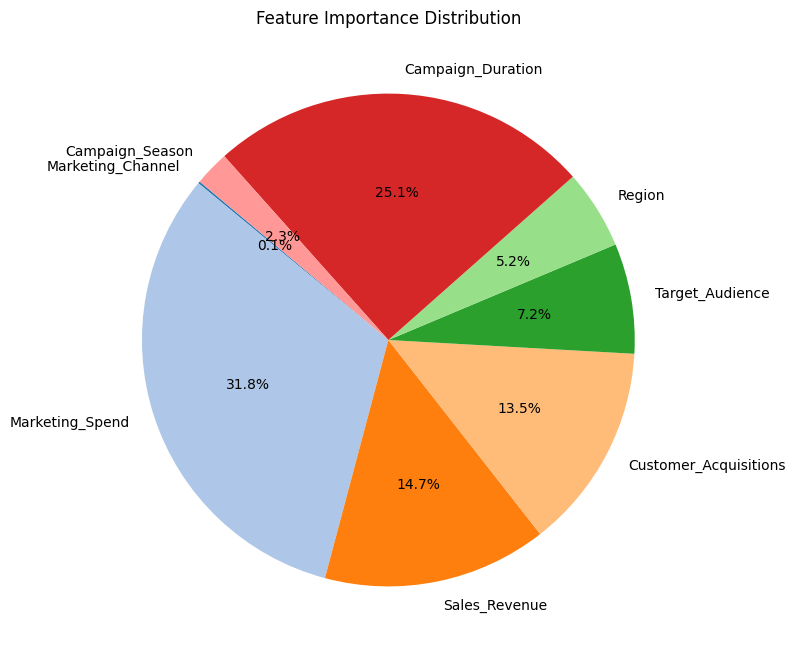

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_train.columns contains feature names and lr.coef_ contains coefficients
features = x_train.columns
coefficients = lr.coef_

# Compute the absolute values of coefficients for contribution visualization
absolute_coefficients = np.abs(coefficients)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    absolute_coefficients,
    labels=features,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Rotate start angle for better visualization
    colors=plt.cm.tab20.colors,  # Use a colormap for distinct colors
)
plt.title('Feature Importance Distribution')
plt.show()


In [ ]:
import pickle
with open('MarketingROI.pkl','wb') as file:
  pickle.dump(lr,file)